In [22]:
from bs4 import BeautifulSoup
import requests  
import pandas as pd
import xlsxwriter
import urllib.request as url
import numpy as np
import os

#cuisines
thessalyDf = pd.read_excel("C:\\Users\\Petros\\Desktop\\Restaurants_of_Thessaly.xlsx")
thessalyDf.columns=['Count','Name','Cuisine','Street','Location','Price Category','Price_1','Price_2','Total_Rating','Num of Reviews','Num of Cuisines','Trip_advisor Url','Food','Service','Value','Atmosphere','Ranking']



In [23]:
thessalyDf.head(5)

,Count,Name,Cuisine,Street,Location,Price Category,Price_1,Price_2,Total_Rating,Num of Reviews,Num of Cuisines,Trip_advisor Url,Food,Service,Value,Atmosphere,Ranking
0,0,Archontaraki,"Steakhouse, Seafood, Mediterranean","Filellinon 57, Larissa 41222 Greece",Larissa,NaN,NaN,NaN,5.0,7 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,NaN,NaN,71
1,1,Monark Comfort Food,International,"Filellinon, 62, Larissa 41221 Greece",Larissa,€20 - €30,20,30,5.0,85 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,NaN,1
2,2,Akamatra,"International, Mediterranean, European","Vuronos 5, Larissa Greece",Larissa,NaN,NaN,NaN,4.5,373 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,2
3,3,Just Winebar,"Italian, Mediterranean, European","6 Protopapadaki, Larissa 412 22 Greece",Larissa,€10 - €25,10,25,4.5,272 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,3
4,4,Nonna Rossa,"Italian, Pizza, Mediterranean","Skilossofou 9, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.5,388 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4,4,4.5,4


In [24]:
#thessalyDf = thessalyDf.drop('Count', 1)

In [25]:
thessalyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
Count               592 non-null int64
Name                592 non-null object
Cuisine             447 non-null object
Street              592 non-null object
Location            592 non-null object
Price Category      186 non-null object
Price_1             186 non-null object
Price_2             186 non-null object
Total_Rating        539 non-null object
Num of Reviews      592 non-null object
Num of Cuisines     495 non-null float64
Trip_advisor Url    592 non-null object
Food                242 non-null object
Service             245 non-null object
Value               245 non-null object
Atmosphere          65 non-null object
Ranking             539 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 78.7+ KB


In [26]:
thessalyDf.columns

Index(['Count', 'Name', 'Cuisine', 'Street', 'Location', 'Price Category',
       'Price_1', 'Price_2', 'Total_Rating', 'Num of Reviews',
       'Num of Cuisines', 'Trip_advisor Url', 'Food', 'Service', 'Value',
       'Atmosphere', 'Ranking'],
      dtype='object')

In [27]:
thessalyDf.shape

(592, 17)

In [28]:
thessalyDf.describe()

,Count,Num of Cuisines
count,592.000000,495.000000
mean,295.500000,1.622222
std,171.039956,1.182151
min,0.000000,0.000000
25%,147.750000,1.000000
50%,295.500000,1.000000
75%,443.250000,3.000000
max,591.000000,3.000000


In [29]:
thessalyDf.isna().sum()

Count                 0
Name                  0
Cuisine             145
Street                0
Location              0
Price Category      406
Price_1             406
Price_2             406
Total_Rating         53
Num of Reviews        0
Num of Cuisines      97
Trip_advisor Url      0
Food                350
Service             347
Value               347
Atmosphere          527
Ranking              53
dtype: int64

In [30]:
thessalyDf=thessalyDf[thessalyDf.Cuisine.isna()==False]

In [31]:
thessalyDf.isna().sum()

Count                 0
Name                  0
Cuisine               0
Street                0
Location              0
Price Category      274
Price_1             274
Price_2             274
Total_Rating         34
Num of Reviews        0
Num of Cuisines       0
Trip_advisor Url      0
Food                255
Service             253
Value               253
Atmosphere          385
Ranking              34
dtype: int64

In [32]:
thessalyDf.Name.value_counts().head()

Archontaraki    5
Vesper          4
Pagoseto        2
Couzina         2
Estrella        2
Name: Name, dtype: int64

In [33]:
thessalyDf = thessalyDf.drop_duplicates(subset='Name', keep='first')

In [34]:
thessalyDf.Name.value_counts().head(10)

Peronio                 1
Chez Antoine            1
Espresso World          1
S' Anammena Karvouna    1
Couzina                 1
Keramario               1
Psarokatastasi          1
BAKALIKO KRITIS         1
Kardaki                 1
Taverna Theologis       1
Name: Name, dtype: int64

In [35]:
thessalyDf = thessalyDf.drop('Count', 1)

In [36]:
thessalyDf

,Name,Cuisine,Street,Location,Price Category,Price_1,Price_2,Total_Rating,Num of Reviews,Num of Cuisines,Trip_advisor Url,Food,Service,Value,Atmosphere,Ranking
0,Archontaraki,"Steakhouse, Seafood, Mediterranean","Filellinon 57, Larissa 41222 Greece",Larissa,NaN,NaN,NaN,5.0,7 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,NaN,NaN,71
1,Monark Comfort Food,International,"Filellinon, 62, Larissa 41221 Greece",Larissa,€20 - €30,20,30,5.0,85 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,NaN,1
2,Akamatra,"International, Mediterranean, European","Vuronos 5, Larissa Greece",Larissa,NaN,NaN,NaN,4.5,373 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,2
3,Just Winebar,"Italian, Mediterranean, European","6 Protopapadaki, Larissa 412 22 Greece",Larissa,€10 - €25,10,25,4.5,272 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,3
4,Nonna Rossa,"Italian, Pizza, Mediterranean","Skilossofou 9, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.5,388 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4,4,4.5,4
5,Adamos,Greek,"9 Panos, Larissa 41222 Greece",Larissa,€9 - €25,9,25,4.5,202 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,4.5,5
6,Bukowski Eatery & Drink,"Bar, International, Mediterranean","11 Panos, Larissa 412 22 Greece",Larissa,NaN,NaN,NaN,4.5,188 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,4.5,6
7,O Bakalogatos,"Mediterranean, Greek,","48 Filellinon, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.0,407 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,4,4,7
8,Bier Center,"German, Greek","26 Gazi Anthimou, Larissa 412 22 Greece",Larissa,€7 - €20,7,20,5.0,68 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,5,4.5,NaN,8
9,Vosporos,"Mediterranean, European, Greek","1 Apollonos, Larissa 41222 Greece",Larissa,€15 - €35,15,35,4.0,206 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,3.5,4,9


In [37]:
#thessalyDf.Name.value_counts().head(10)

In [38]:
thessalyDf.to_excel("C:\\Users\\Petros\\Desktop\\Thessaly_2.xlsx")

In [39]:
thessalyDf['Location'].value_counts()[:11]

Volos       205
Trikala      95
Larissa      91
Karditsa     44
Name: Location, dtype: int64

Text(0.5, 1.0, 'Location')

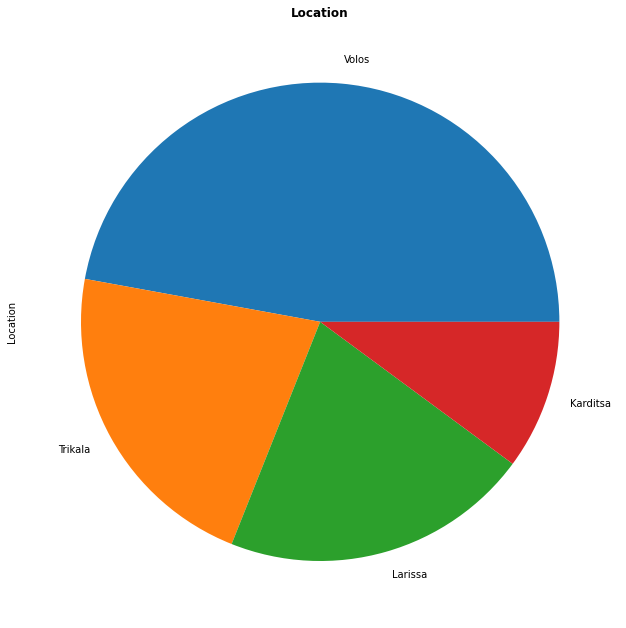

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,11)) 
thessalyDf['Location'].value_counts()[:11].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

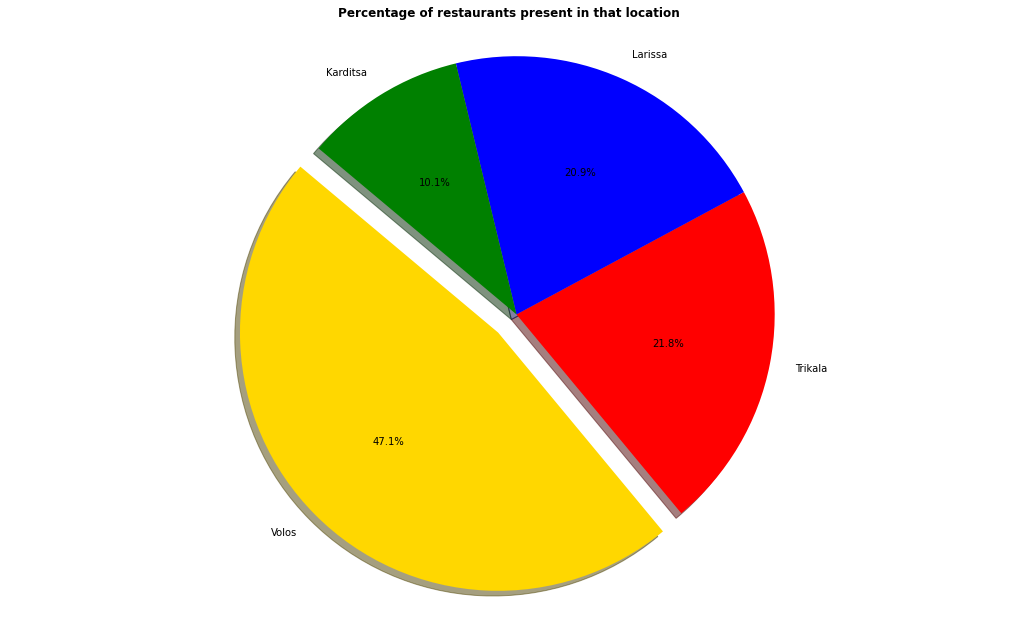

In [41]:
plt.figure(figsize = (18,11))
names = thessalyDf['Location'].value_counts()[:11].index
values = thessalyDf['Location'].value_counts()[:11].values
colors = ['gold', 'red','blue','green']
explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Location vs Count')

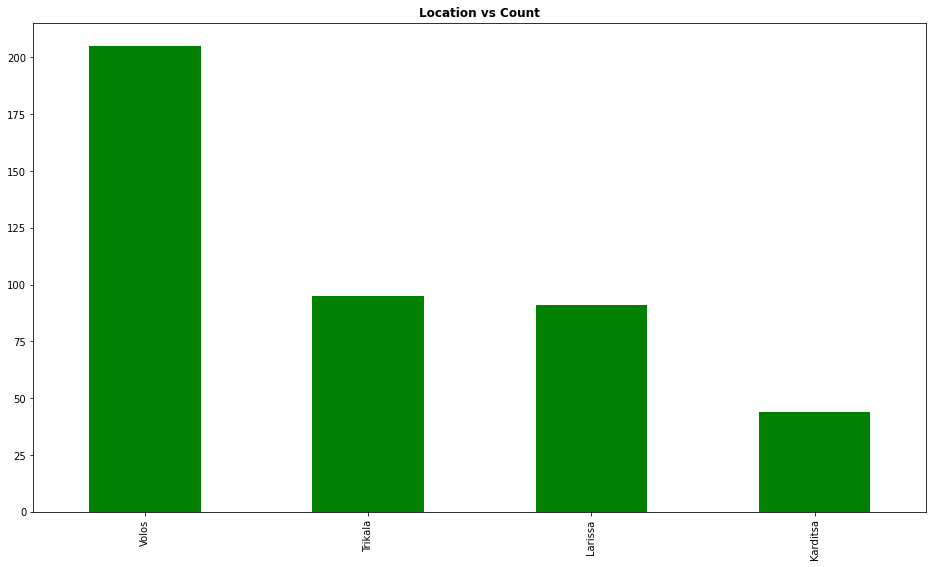

In [42]:
plt.figure(figsize = (16,9))
thessalyDf['Location'].value_counts()[:11].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [43]:
thessalyDf['Location'].nunique()

4

In [44]:
thessalyDf

,Name,Cuisine,Street,Location,Price Category,Price_1,Price_2,Total_Rating,Num of Reviews,Num of Cuisines,Trip_advisor Url,Food,Service,Value,Atmosphere,Ranking
0,Archontaraki,"Steakhouse, Seafood, Mediterranean","Filellinon 57, Larissa 41222 Greece",Larissa,NaN,NaN,NaN,5.0,7 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,NaN,NaN,71
1,Monark Comfort Food,International,"Filellinon, 62, Larissa 41221 Greece",Larissa,€20 - €30,20,30,5.0,85 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,NaN,1
2,Akamatra,"International, Mediterranean, European","Vuronos 5, Larissa Greece",Larissa,NaN,NaN,NaN,4.5,373 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,2
3,Just Winebar,"Italian, Mediterranean, European","6 Protopapadaki, Larissa 412 22 Greece",Larissa,€10 - €25,10,25,4.5,272 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,3
4,Nonna Rossa,"Italian, Pizza, Mediterranean","Skilossofou 9, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.5,388 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4,4,4.5,4
5,Adamos,Greek,"9 Panos, Larissa 41222 Greece",Larissa,€9 - €25,9,25,4.5,202 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,4.5,5
6,Bukowski Eatery & Drink,"Bar, International, Mediterranean","11 Panos, Larissa 412 22 Greece",Larissa,NaN,NaN,NaN,4.5,188 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,4.5,6
7,O Bakalogatos,"Mediterranean, Greek,","48 Filellinon, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.0,407 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,4,4,7
8,Bier Center,"German, Greek","26 Gazi Anthimou, Larissa 412 22 Greece",Larissa,€7 - €20,7,20,5.0,68 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,5,4.5,NaN,8
9,Vosporos,"Mediterranean, European, Greek","1 Apollonos, Larissa 41222 Greece",Larissa,€15 - €35,15,35,4.0,206 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,3.5,4,9


In [45]:
#Average Cost
thessalyDf['Price Category'].value_counts()[:14]

€5 - €20     9
€5 - €15     9
€5 - €10     7
€10 - €20    6
€2 - €8      6
€10 - €15    5
€3 - €10     4
€10 - €30    4
€6 - €12     4
€3 - €8      4
€3 - €7      3
€10 - €25    3
€4 - €15     3
€2 - €10     3
Name: Price Category, dtype: int64

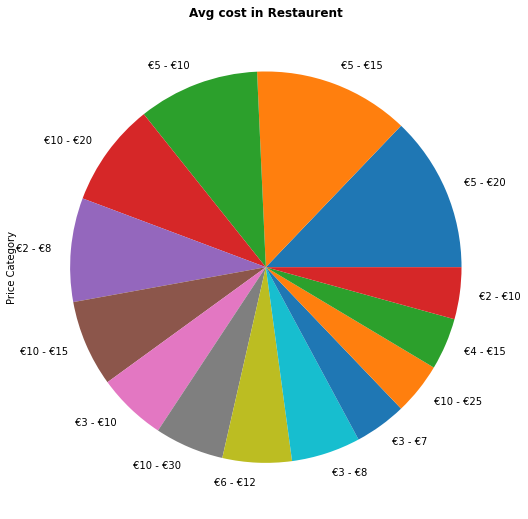

In [46]:
plt.figure(figsize = (14,9))
thessalyDf['Price Category'].value_counts()[:14].plot(kind = 'pie')
plt.title('Avg cost in Restaurent', weight = 'bold')
plt.show()

In [47]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost in Rupees')

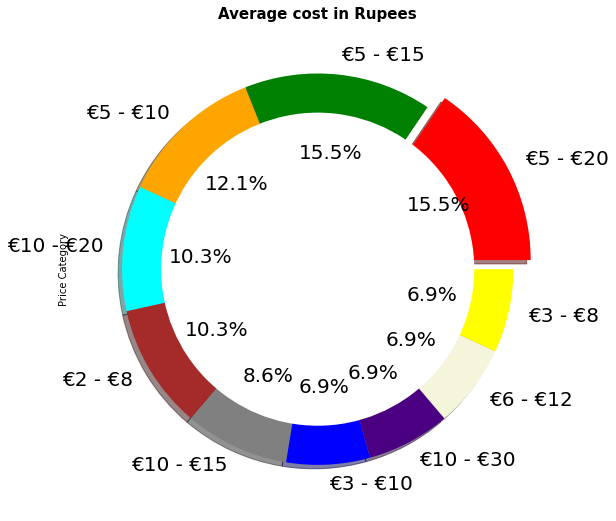

In [48]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = thessalyDf['Price Category'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost in Rupees",fontsize = 15,weight = 'bold')

Average Rating for Thessaly Restaurants:  4.338709677419355


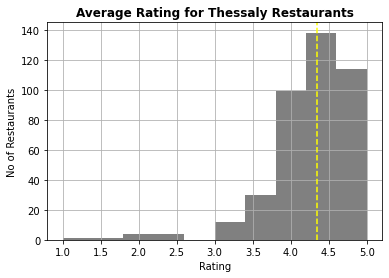

In [49]:
#Ratings
thessalyDf['Total_Rating'] = thessalyDf['Total_Rating'].apply(lambda r: float(r))

thessalyDf.Total_Rating.hist(color='grey')
plt.axvline(x= thessalyDf.Total_Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Thessaly Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print('Average Rating for Thessaly Restaurants: ',thessalyDf.Total_Rating.mean())

In [50]:
#Cuisines

#lets delete the nulll values
cuisines_data = thessalyDf[thessalyDf.Cuisine.notnull()]
cuisines_data.Cuisine = cuisines_data.Cuisine.apply(lambda x:x.lower().strip())

In [51]:
cuisines_count= []

for i in cuisines_data.Cuisine:
    for j in i.split(','):
        if len(j)>1:
            j = j.strip()
            cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

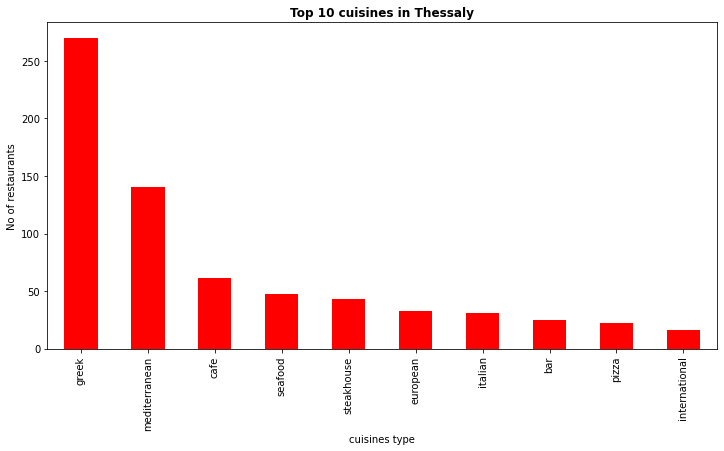

In [52]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Thessaly',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

In [53]:
#prepro

thessalyDf['Cuisine'] = thessalyDf['Cuisine'].str.replace(',' , '') 
thessalyDf['Cuisine'] = thessalyDf['Cuisine'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
thessalyDf['Cuisine'].value_counts().head(10)

Greek                           117
Greek Mediterranean              44
Cafe                             26
Greek Mediterranean Seafood      19
Greek Seafood                    14
Steakhouse                       12
Mediterranean                    11
Greek Steakhouse                 10
European Greek Mediterranean      7
Italian Mediterranean Pizza       6
Name: Cuisine, dtype: int64

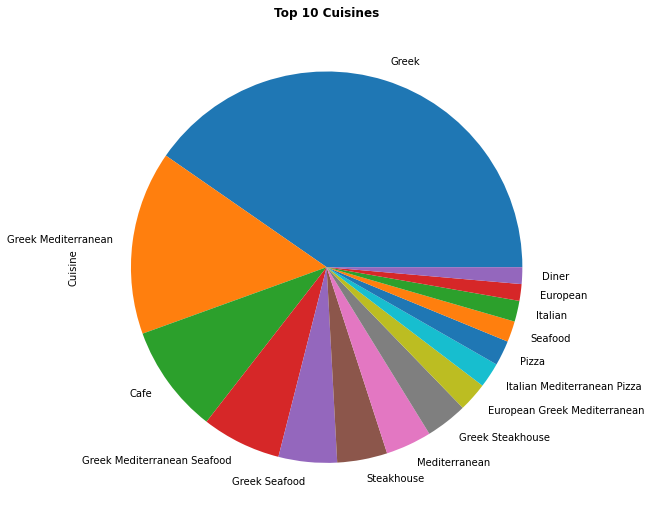

In [54]:
plt.figure(figsize = (18,9))
thessalyDf.Cuisine.value_counts()[:15].plot(kind = 'pie')
plt.title('Top 10 Cuisines', weight = 'bold')
plt.show()

In [55]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

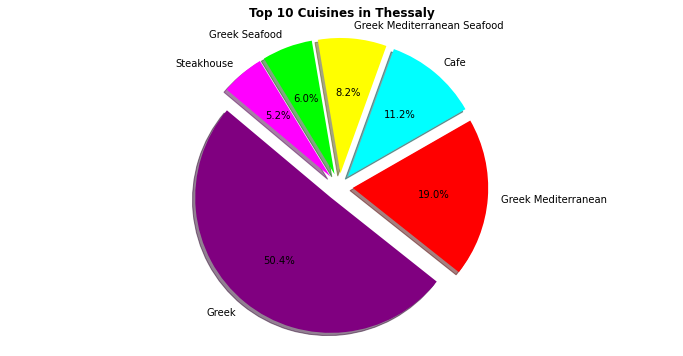

In [56]:
plt.figure(figsize = (12,6))
names = thessalyDf['Cuisine'].value_counts()[:6].index
values = thessalyDf['Cuisine'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Top 10 Cuisines in Thessaly', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [57]:
thessalyDf.columns

Index(['Name', 'Cuisine', 'Street', 'Location', 'Price Category', 'Price_1',
       'Price_2', 'Total_Rating', 'Num of Reviews', 'Num of Cuisines',
       'Trip_advisor Url', 'Food', 'Service', 'Value', 'Atmosphere',
       'Ranking'],
      dtype='object')

In [58]:
thessalyDf

,Name,Cuisine,Street,Location,Price Category,Price_1,Price_2,Total_Rating,Num of Reviews,Num of Cuisines,Trip_advisor Url,Food,Service,Value,Atmosphere,Ranking
0,Archontaraki,Mediterranean Seafood Steakhouse,"Filellinon 57, Larissa 41222 Greece",Larissa,NaN,NaN,NaN,5.0,7 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,NaN,NaN,71
1,Monark Comfort Food,International,"Filellinon, 62, Larissa 41221 Greece",Larissa,€20 - €30,20,30,5.0,85 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,NaN,1
2,Akamatra,European International Mediterranean,"Vuronos 5, Larissa Greece",Larissa,NaN,NaN,NaN,4.5,373 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,2
3,Just Winebar,European Italian Mediterranean,"6 Protopapadaki, Larissa 412 22 Greece",Larissa,€10 - €25,10,25,4.5,272 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,3
4,Nonna Rossa,Italian Mediterranean Pizza,"Skilossofou 9, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.5,388 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4,4,4.5,4
5,Adamos,Greek,"9 Panos, Larissa 41222 Greece",Larissa,€9 - €25,9,25,4.5,202 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,4.5,5
6,Bukowski Eatery & Drink,Bar International Mediterranean,"11 Panos, Larissa 412 22 Greece",Larissa,NaN,NaN,NaN,4.5,188 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,4.5,6
7,O Bakalogatos,Greek Mediterranean,"48 Filellinon, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.0,407 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,4,4,7
8,Bier Center,German Greek,"26 Gazi Anthimou, Larissa 412 22 Greece",Larissa,€7 - €20,7,20,5.0,68 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,5,4.5,NaN,8
9,Vosporos,European Greek Mediterranean,"1 Apollonos, Larissa 41222 Greece",Larissa,€15 - €35,15,35,4.0,206 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,3.5,4,9


In [59]:
thessalyDf['average_price'] = thessalyDf[['Price_1', 'Price_2']].mean(axis=1)
thessalyDf

,Name,Cuisine,Street,Location,Price Category,Price_1,Price_2,Total_Rating,Num of Reviews,Num of Cuisines,Trip_advisor Url,Food,Service,Value,Atmosphere,Ranking,average_price
0,Archontaraki,Mediterranean Seafood Steakhouse,"Filellinon 57, Larissa 41222 Greece",Larissa,NaN,NaN,NaN,5.0,7 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,NaN,NaN,NaN,NaN,71,NaN
1,Monark Comfort Food,International,"Filellinon, 62, Larissa 41221 Greece",Larissa,€20 - €30,20,30,5.0,85 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,NaN,1,25.0
2,Akamatra,European International Mediterranean,"Vuronos 5, Larissa Greece",Larissa,NaN,NaN,NaN,4.5,373 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,2,NaN
3,Just Winebar,European Italian Mediterranean,"6 Protopapadaki, Larissa 412 22 Greece",Larissa,€10 - €25,10,25,4.5,272 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,5,3,17.5
4,Nonna Rossa,Italian Mediterranean Pizza,"Skilossofou 9, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.5,388 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4,4,4.5,4,NaN
5,Adamos,Greek,"9 Panos, Larissa 41222 Greece",Larissa,€9 - €25,9,25,4.5,202 reviews,1.0,https://www.tripadvisor.com//Restaurant_Review...,5,4.5,4.5,4.5,5,17.0
6,Bukowski Eatery & Drink,Bar International Mediterranean,"11 Panos, Larissa 412 22 Greece",Larissa,NaN,NaN,NaN,4.5,188 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,4.5,4,4.5,6,NaN
7,O Bakalogatos,Greek Mediterranean,"48 Filellinon, Larissa 412 21 Greece",Larissa,NaN,NaN,NaN,4.0,407 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,4,4,7,NaN
8,Bier Center,German Greek,"26 Gazi Anthimou, Larissa 412 22 Greece",Larissa,€7 - €20,7,20,5.0,68 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4.5,5,4.5,NaN,8,13.5
9,Vosporos,European Greek Mediterranean,"1 Apollonos, Larissa 41222 Greece",Larissa,€15 - €35,15,35,4.0,206 reviews,3.0,https://www.tripadvisor.com//Restaurant_Review...,4,4.5,3.5,4,9,25.0


In [60]:
#Average Cost
thessalyDf['average_price'].value_counts()

12.5    14
10.0    13
7.5     11
5.0      9
17.5     8
15.0     8
7.0      8
9.0      7
12.0     7
6.0      7
6.5      5
8.0      5
5.5      5
20.0     5
11.0     4
13.0     4
9.5      4
4.0      4
11.5     4
14.0     3
8.5      3
13.5     3
25.0     3
4.5      3
27.5     2
17.0     2
16.5     2
16.0     2
19.0     1
26.5     1
29.0     1
22.5     1
10.5     1
32.5     1
21.0     1
79.0     1
40.0     1
22.0     1
21.5     1
19.5     1
38.5     1
Name: average_price, dtype: int64

In [61]:
count10 = len(thessalyDf[thessalyDf['average_price'] <= 10.0])
print("<= 10: ", count10)

count20 = len(thessalyDf[thessalyDf['average_price'] <= 20.0])
count20 = count20 - count10
print("<= 20: ", count20)

count25 = len(thessalyDf[thessalyDf['average_price'] <= 25.0])
count25 = count25 - count20
print("<= 25: ", count25)

count30 = len(thessalyDf[thessalyDf['average_price'] <= 30.0])
count30 = count30 - count25
print("<= 30: ", count30)

count35 = len(thessalyDf[thessalyDf['average_price'] <= 35.0])
count35 = count35 - count30
print("<= 35: ", count35)

count40 = len(thessalyDf[thessalyDf['average_price'] <= 40.0])
count40 = count40 - count35
print("<= 40: ", count40)

count_over40 = len(thessalyDf[thessalyDf['average_price'] > 40.0])
print("> 40: ", count_over40)

<= 10:  84
<= 20:  69
<= 25:  91
<= 30:  73
<= 35:  92
<= 40:  75
> 40:  1


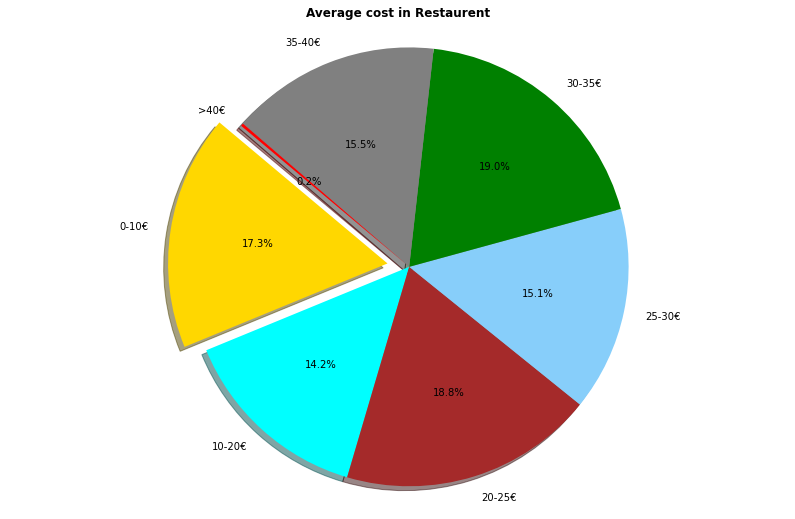

In [71]:
# Data to plot
labels = '0-10€', '10-20€', '20-25€', '25-30€', '30-35€', '35-40€', '>40€'
sizes = [count10, count20, count25, count30, count35, count40, count_over40]
colors = ['gold', 'cyan', 'brown', 'lightskyblue', 'green', 'grey', 'red']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.figure(figsize = (14,9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average cost in Restaurent', weight = 'bold')
plt.axis('equal')
plt.show()

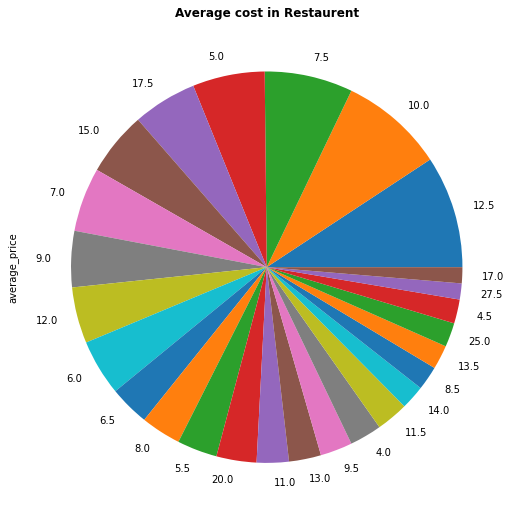

In [63]:
plt.figure(figsize = (14,9))
thessalyDf['average_price'].value_counts()[:17].plot(kind = 'pie')
plt.title('Average cost in Restaurent', weight = 'bold')
plt.show()

In [64]:
#colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost in Restaurants')

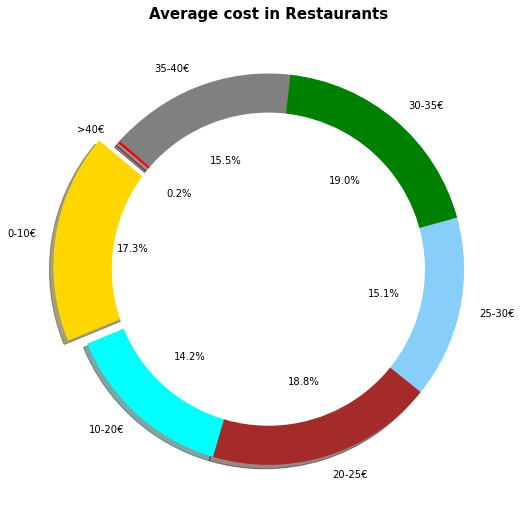

In [70]:
fig= plt.figure(figsize=(16, 9))

labels = '0-10€', '10-20€', '20-25€', '25-30€', '30-35€', '35-40€', '>40€'
sizes = [count10, count20, count25, count30, count35, count40, count_over40]
colors = ['gold', 'cyan', 'brown', 'lightskyblue', 'green', 'grey', 'red']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice



#fig= plt.figure(figsize=(16, 9))
#explode = (0.1, 0, 0, 0, 0, 0, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost in Restaurants",fontsize = 15,weight = 'bold')